# Q5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal
import math

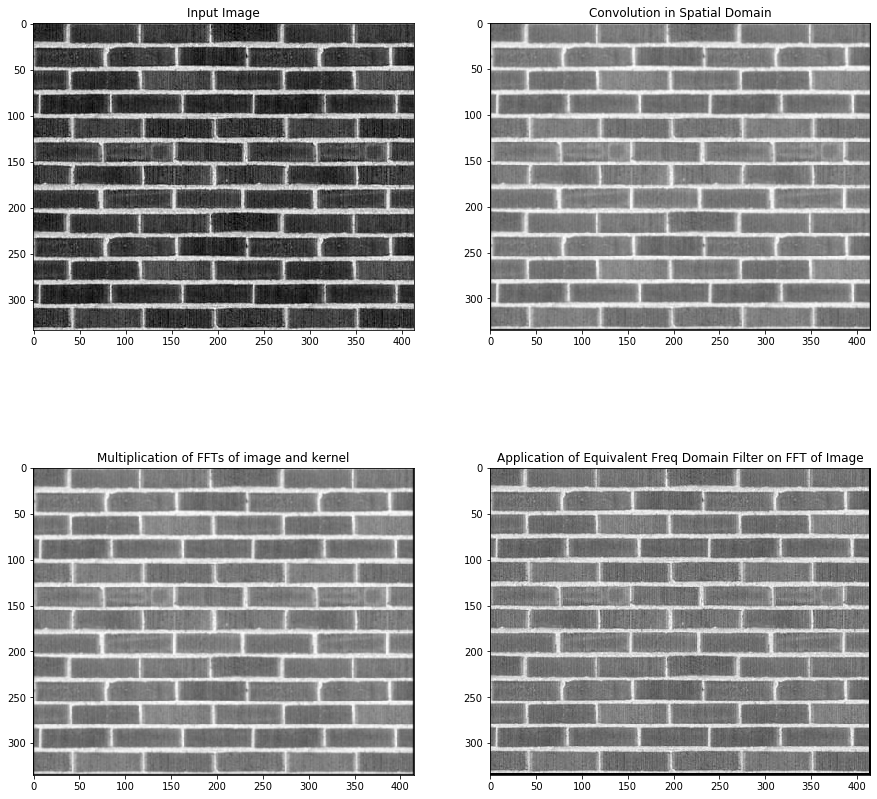

In [5]:
im = cv2.imread('../input_data/bricks.jpg', 0)

h, w = im.shape
kernel = np.array([[0,1,0], [1,2,1], [0,1,0]])
hk, wk = kernel.shape

out_conv = signal.convolve2d(im, kernel)

filt = np.zeros((h+hk-1,w+wk-1))
filt[0:hk, 0:wk] = kernel
img = np.zeros((h+hk-1, w+wk-1))
img[0:h, 0:w] = im

f = np.fft.fft2(img)
k = np.fft.fft2(filt)
fk = np.multiply(f,k)
out_fft_filt = np.fft.ifft2(fk)

H, W = img.shape
u = np.array(range(0, H))
v = np.array(range(0, W))

V, U = np.meshgrid(v,u)

formula = 2 + np.exp(2j * np.pi * U / H) + np.exp(-2j * np.pi * U / H) + np.exp(2j * np.pi * V / W) + np.exp(-2j * np.pi * V / W)

f_formula = f*h
out_fft_formula = np.fft.ifft2(f_formula)

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(im, cmap='gray')
plt.title("Input Image")
plt.subplot(222)
plt.imshow(out_conv, cmap='gray')
plt.title("Convolution in Spatial Domain")
plt.subplot(223)
plt.imshow(out_fft_filt.real, cmap='gray')
plt.title("Multiplication of FFTs of image and kernel")
plt.subplot(224)
plt.imshow(out_fft_formula.real, cmap='gray')
plt.title("Application of Equivalent Freq Domain Filter on FFT of Image")
plt.show()

H(u,v) is a low pass filter.